In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [41]:
data = pd.read_csv("C:\\Users\\robot\\Documents\\Data\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
orig_data = data


Let's take a basic look at the data to see what we're working with.

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The data in the "Attrition" column is one of the most central to this dataset, however, it is quite difficult to work wiith in "yes/no" form.  Let's replace that system with a numerical 1 for "yes" and 0 for "no"

In [6]:
data.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
attrition = data[(data['Attrition'] != 0)]
no_attrition = data[(data['Attrition'] == 0)]

I'm going to pull the data.head() again, just to make sure that our substitution worked correctly.

In [7]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Nice!  From here it will be much easier to use Attrition as a numerical variable for visualizations and analysis.

Before I jump into looking at Attrition, I would like to get a sense of some facets of our workforce without comparing it against the Attrition variable.  Below, I'll be setting up a few different graphs with variables that I'm curious about.  It is worth noting during these types of analyses that some information may be indicative of a protected class, such as Age, Race, or Sexual Orientation, which can complicate the ability to make business decisions based on the data.

First, you'll see me create a separate DataFrame for the "Age" column, as the number of responses makes it inconvenient to create an index to order the columns - You can see examples of this other method in the "Years Since Last Promotion" and "Employee Commute Length" plots.

In [8]:
age_freq = pd.crosstab(index=data['Age'], columns='count')

<AxesSubplot:title={'center':'Employee Commute Length'}>

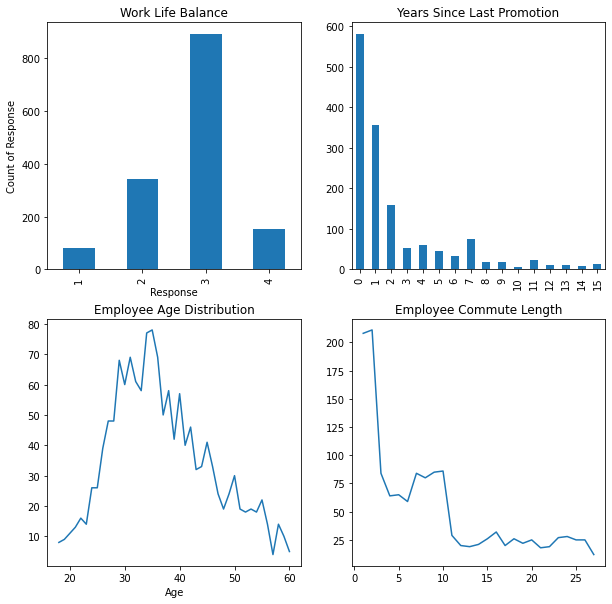

In [9]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (2, 2)

plt.subplot2grid(fig_dims, (0, 0))
data['WorkLifeBalance'].value_counts().reindex(index=[1,2,3,4]).plot(
    kind='bar', title='Work Life Balance', xlabel= "Response", ylabel = "Count of Response")

plt.subplot2grid(fig_dims, (0, 1))
data['YearsSinceLastPromotion'].value_counts().reindex(index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).plot(
    kind='bar', title='Years Since Last Promotion')

plt.subplot2grid(fig_dims, (1, 0))
age_freq["count"].plot(
    title='Employee Age Distribution')

plt.subplot2grid(fig_dims, (1, 1))
data['DistanceFromHome'].value_counts().reindex(index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]).plot(
    kind='line', title='Employee Commute Length')

One limitation of the data is noticeable in the "Work Life Balance" plot - The numbers 1, 2, 3, and 4 do not provide much info unless you know what responses they align with - "Bad", "Good", "Better", and "Best".  For data like this I think an interesting folllow-up would to be to create a similar dashboard using Tableau to have a little more control over aesthetics. 

Now that we have some interesting information and vizualizations for what our workforce looks like overall, let's add on the inclusion of the Attrition variable to get an idea of who is leaving the organization. Let's start with overall Attrition.

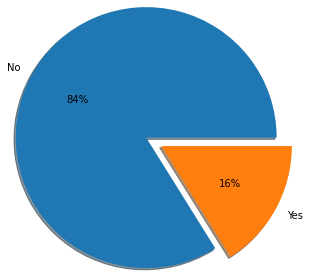

In [77]:
overall_attrition = data.groupby('Attrition')['Attrition'].count()
plt.pie(overall_attrition, explode=[0.0, 0.2], labels=['No', 'Yes'], radius=1.5, autopct='%1.0f%%',  shadow=True);



According to the SHRM Human Capital Benchmarking Report, Attrition averages around the high teens, percentage wise - so it seems like we are in a pretty good place here.  Let's break it down to the department level and see if there are any noticeable variances.

<AxesSubplot:title={'center':'Attrition by Department'}, xlabel='Department,Attrition', ylabel='# Department Employees'>

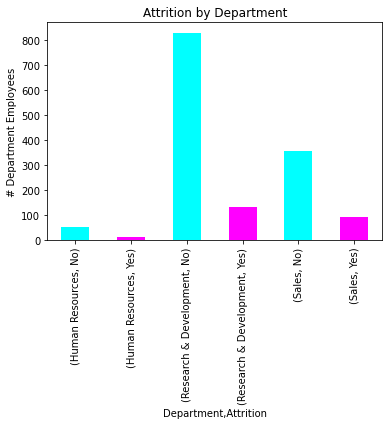

In [93]:
data.groupby(
    ['Department'])['Attrition'].value_counts().plot(
    kind = 'bar', ylabel = "# Department Employees", title = "Attrition by Department", stacked = True, color = ['cyan', 'magenta'])


<AxesSubplot:title={'center':'Attrition by Department'}, ylabel='Attrition,DistanceFromHome'>

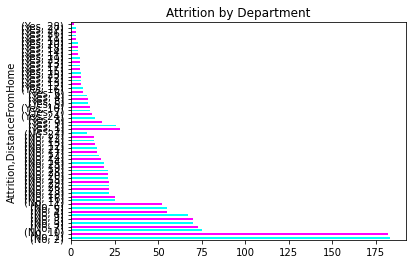

In [85]:
data.groupby(
    'Attrition')['DistanceFromHome'].value_counts().plot(
    kind = 'barh', ylabel = "# Department Employees", title = "Attrition by Department", stacked = True, color = ['cyan', 'magenta'])


TypeError: '<' not supported between instances of 'str' and 'int'

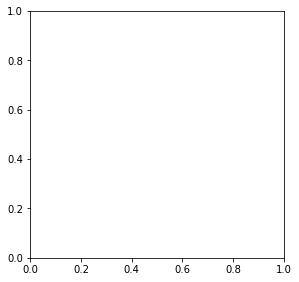

In [102]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (2, 2)

plt.subplot2grid(fig_dims, (0, 0))
overall_attrition = data.groupby('Department')['Attrition'].count()
plt.pie(overall_attrition, explode=[0.0, 0.2], labels=['No', 'Yes'], radius=1.5, autopct='%1.0f%%',  shadow=True);

plt.subplot2grid(fig_dims, (0, 1))
data.groupby(['Department']).plot(kind = "pie", y = "Attrition" )

#I swear to god this almost works.  Want three pie charts by department in figure

In [35]:
dept_data = pd.crosstab(index=data['Department'], columns='count')
dept_data.groupby("Attrition").plot(kind='bar', stacked=True, color=['steelblue', 'red'])

KeyError: 'Attrition'

In [54]:
dept_data = orig_data.groupby(['DistanceFromHome','Department'])[data['Attrition'].value_counts()].sum().unstack().fillna(0)
dept_data


KeyError: 'Columns not found: 1233, 237'

In [ ]:
dept_data.plot(kind='bar', stacked=True)